<a href="https://colab.research.google.com/github/kacper-dobrow/tensorflow-course/blob/main/01_neural_net_regression_in_tf.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Intro to regression with neural nets in TF

In short predicting a value with input data

In [121]:
# Import TF
import tensorflow as tf
tf.__version__

'2.13.0'

## Creating data to view and fit

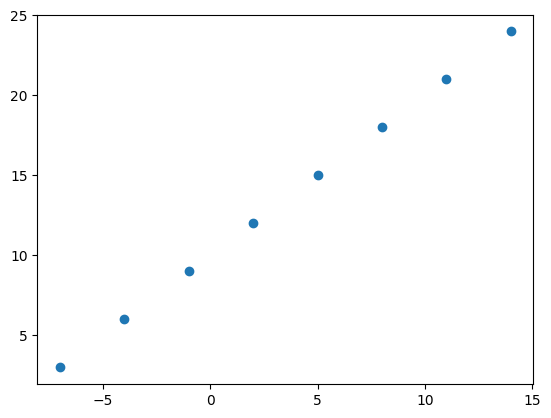

In [122]:
import numpy as np
import matplotlib.pyplot as plt

#create features (input)
X = np.array([-7.,-4.,-1.,2.,5.,8.,11.,14.])

#create labels (output)
y = np.array([3.,6.,9.,12.,15.,18.,21.,24.])

#visualize data with matplotlib
plt.scatter(X,y)

In [123]:
y == X+10

array([ True,  True,  True,  True,  True,  True,  True,  True])

## Input and output shapes

In [124]:
# create a demo tensor for our housing price prediction problem
house_info = tf.constant(['bedroom','bathroom','garage'])
house_price = tf.constant([939700.]) #in for of a list - remember
house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=float32, numpy=array([939700.], dtype=float32)>)

In [125]:
input_shape = X[0].shape
output_shape = y[0].shape
input_shape, output_shape

((), ())

In [126]:
# turn our np arrays into tensors
X = tf.cast(tf.constant(X),dtype=tf.float32)
y = tf.cast(tf.constant(y),dtype = tf.float32)
X,y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [127]:
input_shape = X[0].shape
output_shape = y[0].shape
input_shape, output_shape

(TensorShape([]), TensorShape([]))

## Steps in modelling in Tensorflow

1. Create a model - define input, output and hidden layers
2. Compile the model - define the loss fcn that tells you how far away from 'real values' you are, and the optimizer and evaluation metrics
3. Fit the model - letting the model find patterns between inputs and outputs (features and labels)

Reminder for the steps in modelling with tf
1. Get data ready
2. Build or pick a pretrained model
3. Fit the model to the data and make a prediction
4. Evaluate the model
5. Improve through experimentation
6. Save and reload the trained model

> Blok z wcięciem



In [128]:
# Set random seed for reproducibility
tf.random.set_seed(42)

# 1. Create a model using the sequential API
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.MAE, #MAE is short for mean absolute error
              optimizer = tf.keras.optimizers.SGD(), #SGD is short for stochastic gradient descent
              metrics = ['mae']) #means that we use the tf.keras.losses.MAE   'mae' is sort of an alias

# 3. Fit the model
model.fit(tf.expand_dims(X,axis=-1),y,epochs=5) # fit inputs X to outputs y and you have 5 opportunities to do it right
#tf.expand_dims(X,axis=-1) istead of just X, because model.fit needs a higher dimensional input tensor


Epoch 1/5
1/1 [==============================] - 0s 350ms/step - loss: 16.9925 - mae: 16.9925
Epoch 2/5
1/1 [==============================] - 0s 11ms/step - loss: 16.7113 - mae: 16.7113
Epoch 3/5
1/1 [==============================] - 0s 20ms/step - loss: 16.4300 - mae: 16.4300
Epoch 4/5
1/1 [==============================] - 0s 12ms/step - loss: 16.1488 - mae: 16.1488
Epoch 5/5
1/1 [==============================] - 0s 14ms/step - loss: 15.8675 - mae: 15.8675


In [129]:
# Try to make a prediction using our model
y_pred = model.predict([17.])
y_pred

1/1 [==============================] - 0s 78ms/step


array([[-9.237693]], dtype=float32)

## Improving the model

We improve the model by altering the steps we took in order to create the model
1. Creating the model - add more layers, add more hidden neurons, change the activation fcn
2. Compiling the model - change the optimizer, **learning rate**
3. Fitting the model - fit it for more epochs or more data

In [130]:
# let's rebuild our model

#1. create the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.SGD(),
              metrics = 'mae')

# 3. Fit the model
model.fit(tf.expand_dims(X,axis=-1),y,epochs=100)

Epoch 1/100
1/1 [==============================] - 0s 328ms/step - loss: 11.3435 - mae: 11.3435
Epoch 2/100
1/1 [==============================] - 0s 12ms/step - loss: 11.2110 - mae: 11.2110
Epoch 3/100
1/1 [==============================] - 0s 11ms/step - loss: 11.0785 - mae: 11.0785
Epoch 4/100
1/1 [==============================] - 0s 9ms/step - loss: 10.9460 - mae: 10.9460
Epoch 5/100
1/1 [==============================] - 0s 11ms/step - loss: 10.8135 - mae: 10.8135
Epoch 6/100
1/1 [==============================] - 0s 10ms/step - loss: 10.6810 - mae: 10.6810
Epoch 7/100
1/1 [==============================] - 0s 11ms/step - loss: 10.5485 - mae: 10.5485
Epoch 8/100
1/1 [==============================] - 0s 12ms/step - loss: 10.4160 - mae: 10.4160
Epoch 9/100
1/1 [==============================] - 0s 10ms/step - loss: 10.2835 - mae: 10.2835
Epoch 10/100
1/1 [==============================] - 0s 14ms/step - loss: 10.1510 - mae: 10.1510
Epoch 11/100
1/1 [==============================]

In [131]:
# Remind ourselves of the data
X,y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [132]:
#Model prediction
model.predict([17.])

1/1 [==============================] - 0s 69ms/step


array([[29.746986]], dtype=float32)

In [133]:
#once again try to improve the net

# 1. create the model
#add an extra layer
model = tf.keras.Sequential([
    tf.keras.layers.Dense(50, activation=None), #only adding one hidden layer
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(optimizer = tf.keras.optimizers.Adam(lr = 0.01), #learning rate is probably the most important hyperparameter OF THEM ALL
              loss = 'mae', #keyword instead of explicit function
              metrics = ['mae'])

# 3. fit the model to the data
model.fit(tf.expand_dims(X,axis = -1),y,epochs = 100)

Epoch 1/100
1/1 [==============================] - 1s 619ms/step - loss: 14.2332 - mae: 14.2332
Epoch 2/100
1/1 [==============================] - 0s 14ms/step - loss: 14.1648 - mae: 14.1648
Epoch 3/100
1/1 [==============================] - 0s 16ms/step - loss: 14.0964 - mae: 14.0964
Epoch 4/100
1/1 [==============================] - 0s 20ms/step - loss: 14.0281 - mae: 14.0281
Epoch 5/100
1/1 [==============================] - 0s 15ms/step - loss: 13.9598 - mae: 13.9598
Epoch 6/100
1/1 [==============================] - 0s 12ms/step - loss: 13.8915 - mae: 13.8915
Epoch 7/100
1/1 [==============================] - 0s 12ms/step - loss: 13.8233 - mae: 13.8233
Epoch 8/100
1/1 [==============================] - 0s 11ms/step - loss: 13.7551 - mae: 13.7551
Epoch 9/100
1/1 [==============================] - 0s 16ms/step - loss: 13.6869 - mae: 13.6869
Epoch 10/100
1/1 [==============================] - 0s 14ms/step - loss: 13.6188 - mae: 13.6188
Epoch 11/100
1/1 [==============================

In [134]:
model.predict([17.])

1/1 [==============================] - 0s 71ms/step


array([[28.650896]], dtype=float32)

To sum up - methods to improve the net:
* add layers
* increase no of hidden neurons
* change activation fcns
* change optimizers
* change the **learning rate**
* fit on more data
* fit for longer - more epochs

## Evaluating a model

In practice a typical workflow is:
1. Build a model
2. fit the model
3. Evaluate the model
4. Tweak the model
5. Repeat steps 2-4 until meets criteria

When evaluating **visualize**
* data
* the model
* training parameters
* predictions of the model

In [135]:
# make a bigger dataset
X = tf.range(-100.,100.,4.,dtype = tf.float32)
y= X+10.
X = tf.expand_dims(X,axis=-1)

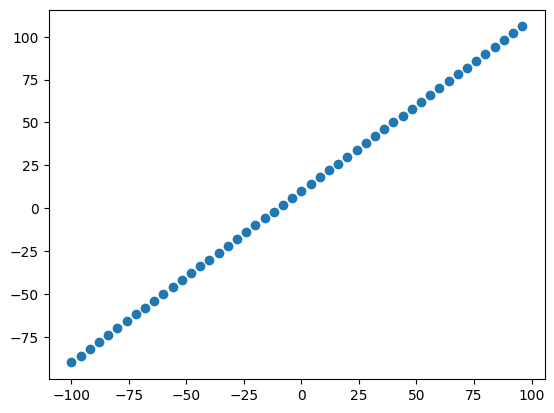

In [136]:
plt.scatter(X,y) #dots if I wanted to have a line I would pass plt.plot(X,y)

### 3 sets - training, validating, test set

* training set - typically 70-80% - the model learns from this data
* validation set - the model gets tuned on this data, typ 10-15%
* test set - the model gets evaluated upon the performance on this data, typ 10-15%

for now we'll split it only to two sets - training and test

In [137]:
# check the length of how many samples we have
len(X)

50

In [138]:
# split the data into train and test sets
X_train = X[:40] # first 80% of data
X_test = X[40:]

y_train = y[:40]
y_test = y[40:]

### Visualizing the data

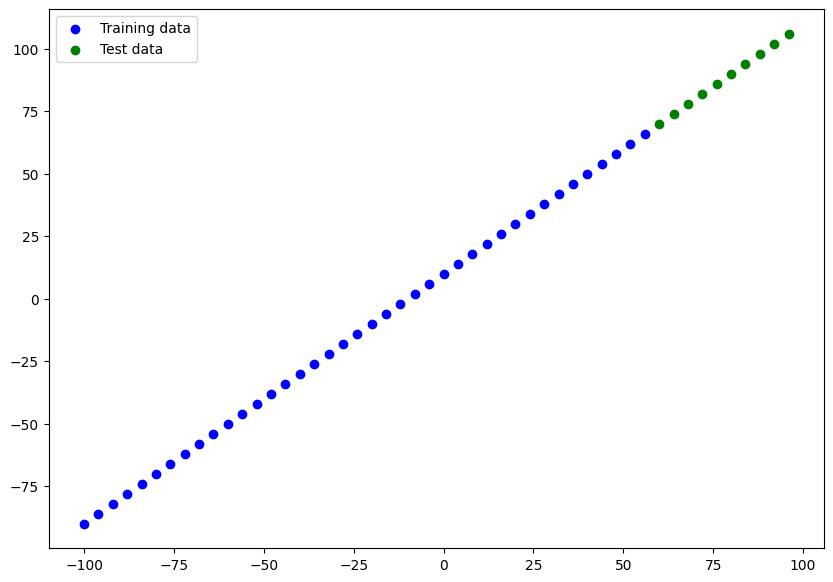

In [139]:
plt.figure(figsize=(10,7))
# Plot training data in blue
plt.scatter(X_train,y_train,c='b',label = 'Training data')
# Plot test data in blue
plt.scatter(X_test,y_test,c='g',label = 'Test data')
plt.legend()

In [140]:
#neural net for our data
# 1. create
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. compile
model.compile(optimizer=tf.keras.optimizers.SGD(),
              loss = 'mae',
              metrics='mae')
# 3. fit
#model.fit(X_train,y_train,epochs=100)

### Visualizing the model

In [143]:
# Let's create a model thet builds automatically by defining the input_shape argument in the first layer
tf.random.set_seed(42)

# 1. Create
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, input_shape = (1,)), #dense means that the layer is fully connected
    tf.keras.layers.Dense(1)
    ])

# 2. compile
model.compile(loss = 'mae',
              optimizer = tf.keras.optimizers.SGD(),
              metrics = 'mae') # alternatively a list of metrics
model.summary()

Model: "sequential_50"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_64 (Dense)            (None, 10)                20        
                                                                 
 dense_65 (Dense)            (None, 1)                 11        
                                                                 
Total params: 31 (124.00 Byte)
Trainable params: 31 (124.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


* total parameters - all parameters present in the model wich the model is going to learn
* trainable parameters - the parameters the model can update as it trains (we can exclude some of them from training if we don't want them to change)
* non-trainable parameters - these excluded

<< MIT's introduction to deep learning video >>

In [144]:
# Fit to data

model.fit(X_train,y_train, epochs=100, verbose = 0)

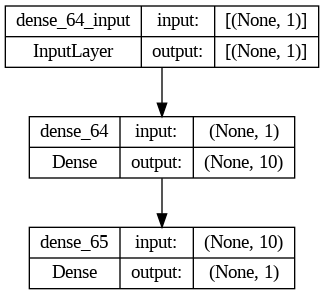

In [145]:
from tensorflow.keras.utils import plot_model
plot_model(model=model,show_shapes=True)

### Visualize our model's predictions

To visualize predictions, plot them against the true values

In [151]:
# make predictions
y_pred = tf.constant(model.predict(X_test))
X_test.shape, y_pred.shape

1/1 [==============================] - 0s 35ms/step


(TensorShape([10, 1]), TensorShape([10, 1]))

In [152]:
#create a plotting fcn in case I want to use it in the future
def plot_predictions(train_features = X_train,
                     train_labels = y_train,
                     test_features = X_test,
                     test_labels = y_test,
                     predictions = y_pred):
  '''
  plots training and test data against the predictions of the model
  '''
  plt.figure(figsize = (10,7))
  # plot training data in blue
  plt.scatter(train_features,train_labels,c='b',label='Training data')
  #plot test data in green
  plt.scatter(test_features,test_labels,c='g',label = 'Test data')
  #plot predictions in red
  plt.scatter(test_features,predictions,c='r',label= 'Predictions')
  #show the legend
  plt.legend()


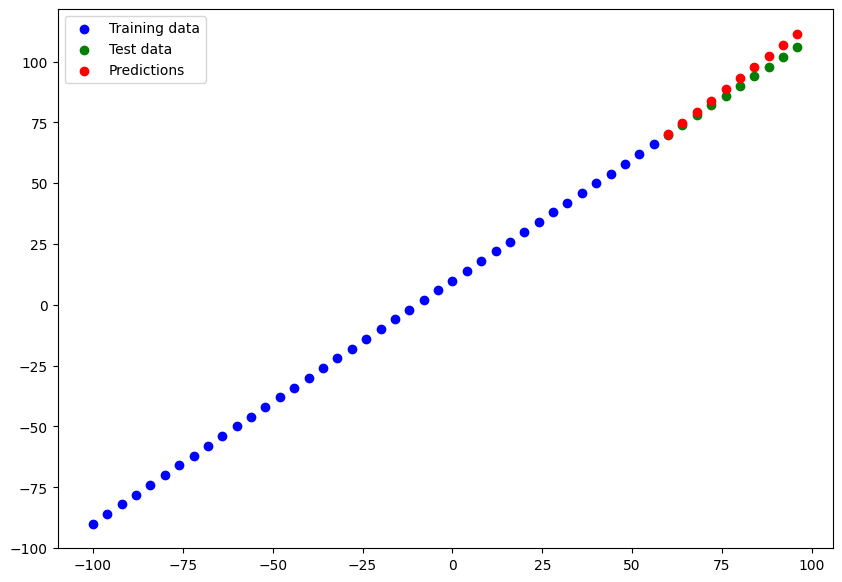

In [153]:
plot_predictions()

### Evaluation metrics